<a href="https://colab.research.google.com/github/rmpbastos/data_science/blob/master/_0011_Statistics_02_Measuring_and_Visualizing_the_Spread_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python libraries used in this article
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set default matplotlib parameters
LIGHT_GRAY = '#ababab'
MID_GRAY = '#898989'
DARK_GRAY = '#585858'
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = DARK_GRAY
mpl.rcParams['xtick.color'] = DARK_GRAY
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.color'] = DARK_GRAY
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['grid.color'] = LIGHT_GRAY
mpl.rcParams['grid.alpha'] = 0.1
mpl.rcParams['axes.edgecolor'] = LIGHT_GRAY
mpl.rcParams['patch.edgecolor'] = DARK_GRAY
mpl.rcParams['patch.linewidth'] = 0.5

# Statistics #02 - Measuring and Visualizing the Spread of Data
### With concepts of Range, Quartiles, and how to build Box Plots with Python


---
![Statistics](https://raw.githubusercontent.com/rmpbastos/data_science/master/img/hunter-harritt-Ype9sdOPdYc-unsplash.jpg)


In the [first article](https://colab.research.google.com/github/rmpbastos/data_science/blob/master/_0010_Statistics_01_Mean%2C_Median_and_Mode.ipynb) of this series, we examined the most common measures of central tendency, the mean, median, and mode, as well as the concept of an outlier.

However, these values may not provide us with all the information we need when analyzing a data set. In this article, we'll start talking about what we can do to measure and visualize the dispersion of data within a distribution.

## Range

The first, and probably the simplest, way to measure the spread of data is the **range**. It can be determined by taking the largest value in the set and subtracting the smallest. 

Let's consider the same example used in the last article, cited above. In that case, we assumed we surveyed 10 recent graduates about their salaries and got the following set:
<br><br>
**\$15,000 | \$15,000 | \$20,000 | \$20,000 | \$20,000 | \$25,000 | \$25,000 | \$30,000 | \$35,000 | \$200,000**
<br><br>
Here is how we can determine this set's range:

$Range = largest\; value\: - \:smallest\; value = 200,000 - 15,000$
<br><br>
$Range = 185,000$

The histogram below will help us visualize how the values are distributed in the set.

In [ ]:
salaries = [15000, 15000, 20000, 20000, 20000, 25000, 25000, 30000, 35000, 200000]
salaries_df = pd.DataFrame(salaries, columns=["salaries"])

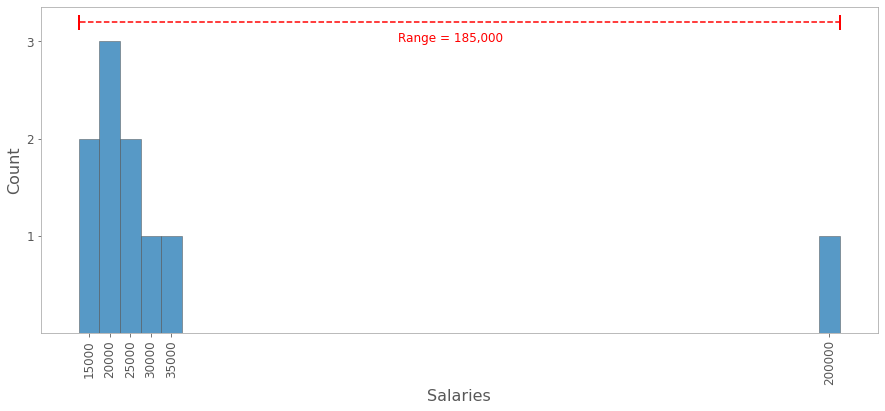

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

yticks = [1, 2, 3]
xticks = [17500, 22500, 27500, 32500, 37500, 197500]
xlabels = [15000, 20000, 25000, 30000, 35000, 200000]

sns.histplot(data=salaries_df, bins=37, legend=None)

plt.xticks(ticks=xticks, labels=xlabels, rotation=90)
plt.yticks(ticks=yticks)
plt.xlabel("Salaries")
plt.axhline(y=3.2, xmin=0.047, xmax=0.955, color = 'r', linestyle='dashed')
for val in (15000, 200000):
  plt.axvline(x=val, ymin=0.93, ymax=0.971, color='r', linewidth=2)

x_pos = (200000 - 15000) / 2
plt.text(x_pos, 3, "Range = 185,000", color='r', fontsize=12)

plt.show()

Notice that although most of the values are concentrated around **15,000 and 35,000**, the range was stretched out by the outlier. This happens because the range is very **sensitive to outliers**.

If we just ignored the outlier, our range would decrease dramatically to **20,000**, possibly giving us a better picture of the data but it wouldn't be good practice to deliberately ignore a value from the data set. So what can we do?

We can start by talking about the notion of **percentiles**. Percentiles split a data set into hundredths, considering that the data is lined up in ascending order. To illustrate, the 50$^{th}$ percentile is the **median**, because 50% of the data falls below that mark, and the other 50% are higher.

In statistics, it's common to see the data split into **quartiles**, which represent a quarter of the data, or 25 percentiles, for what it's worth. 


## Quartiles

Since a quartile represents a quarter of the data, we can split our set into 4 quartiles.

The first quartile, also called **Q1**, is a mark where 25% of the data falls below it. The second quartile, **Q2**, is the middle point, that is, the median. And the third quartile, **Q3** has 75% of the data below it.

### How to identify the quartiles

Identifying Q1, Q2, and Q3 is quite simple, as you just need to know how to find the median - Keep in mind that there are several ways to compute the quartiles. Here, I'll show you one of them that is simple and widely used. 

Briefly, here's how to find the median (the data set has to be ordered):


*   If the number of observations is odd, it's the number right in the middle.
*   If the number of observations is even, it's the mean of the middle two numbers.

Now, to find the quartiles you should do the following:


1.   Find the median (**Q2**), slicing the data in two halves.

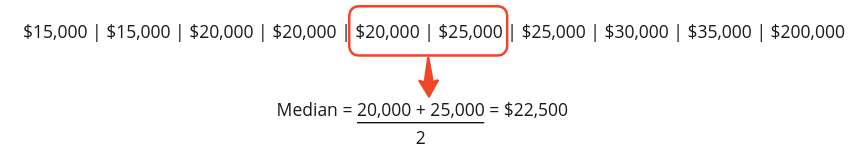

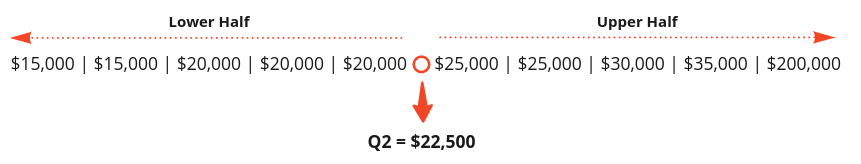

2.   **Q1** is the median of the lower half of the data;


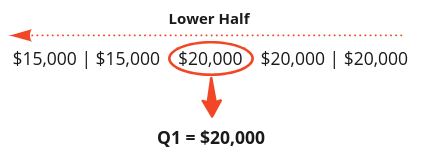

3.   **Q3** is the median of the upper half of the data.

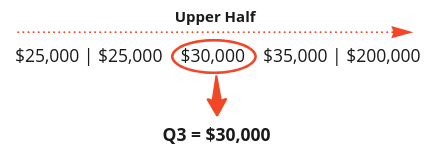

### Interquartile Range

Another important concept to bear in mind is the Interquartile Range (**IQR**). It represents the data between Q1 and Q3.
<br><br>
$IQR = Q3 - Q1$

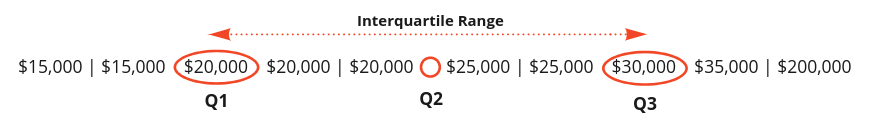

As you can see, the interquartile range ignores the values below Q1 and above Q3, only using the central 50% of the data. It means that the IQR is substantially less sensitive to outliers than the range we saw in the earlier session.

## Box Plots

Box plot is a type of diagram that is great to represent ranges and data dispersion in the set. A box plot displays Q1, Q2, and Q3, as well lower and upper bounds, beyond which lie the outliers.

### Anatomy of a Box Plot

Let's take a look at the elements of a box plot. (Notice that the diagram is not scaled for our data set, it's just an example to help us visualize all the elements)

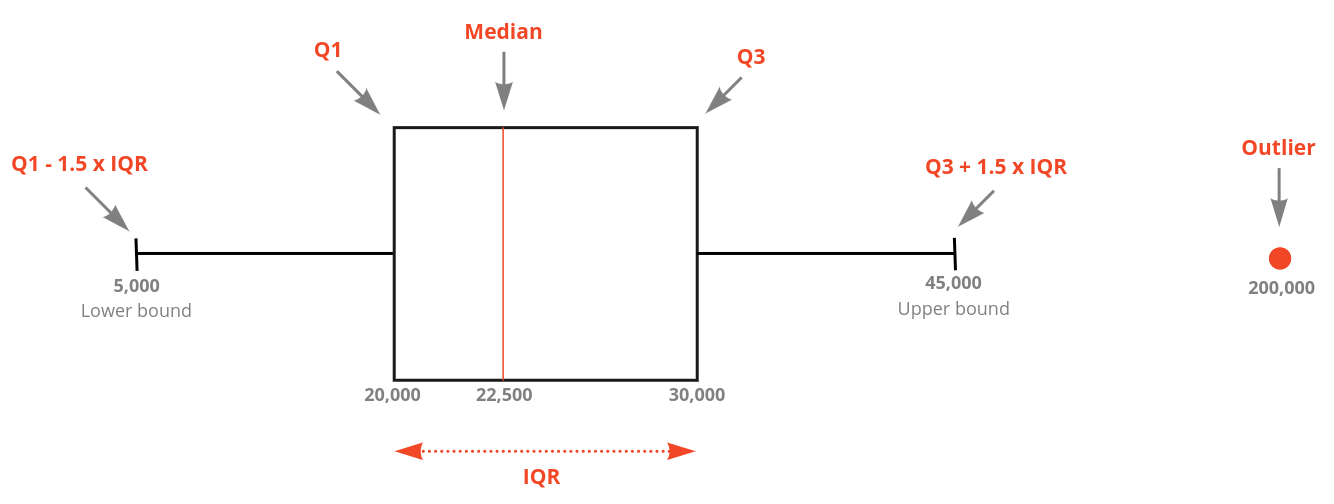

The box, in the middle of the diagram, displays the central 50% of the data. It is delimited by Q1 on the left and Q3 on the right, and the red line inside it shows the median. The length of the box represents the interquartile range (IQR).

Outside the box, two lines stretch on each side. Those lines are frequently referred to as "whiskers". The left whisker spreads down to the lower bound (it's common to calculate it as **$Q1 - 1.5 \times IQR$**), and the right whisker spreads up to the upper bound (**$Q3 + 1.5 \times IQR$**). All points located outside the lower and upper bounds are considered outliers. 

### Building a box plot with Python

Now, as an additional topic, let's see how to build a box plot using Python.

There are several different tools for building graphs and diagrams. Here, I'm using [**matplotlib**](https://matplotlib.org/), a Python library for visualizations. Please find below the plots and the code I used.


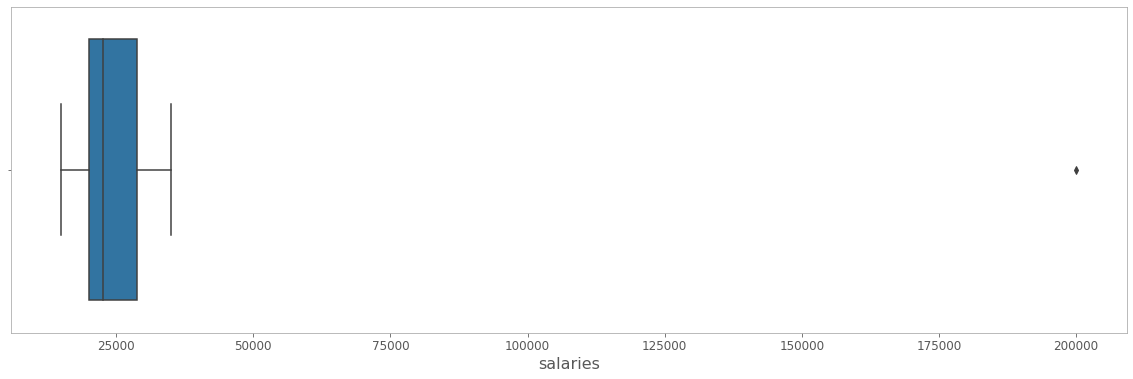

In [ ]:
# Create a DataFrame containing all salaries
salaries = [15000, 15000, 20000, 20000, 20000, 25000, 25000, 30000, 35000, 200000]
salaries_df = pd.DataFrame(salaries, columns=["salaries"])

# Box Plot
fig, ax = plt.subplots(figsize=(20,6))

sns.boxplot(data=salaries_df, x=salaries_df["salaries"], sym="red")
plt.show()

Notice how the box is squeezed to the left. That's because we have an extreme value, 200,000, that is represented as a small diamond-shaped mark in the figure. Just as a side note, it's worth mentioning that **matplotlib** evaluates the quartiles a bit differently than we did, but the results are similar.

## Conclusion

Whether you are only looking for a simple explanation on some statistics topics, or if you are learning how to draw graphs in Python, I hope this article may help you a bit. A future article will dive into the measure of variability, describing variance and standard deviation. If you are interested in other topics in statistics, you can check the first article of this series, covering [Mean, Median, and Mode](https://bit.ly/3wvJafG).

To sum up, let's review what was covered in this article.

#### **Range**

*   A simple way to measure the spread of data.
*   It's the difference between the largest and smallest values in a set
*   Not very reliable, as it's highly sensitive to outliers.

#### **Quartiles**

*   Slices the data in quarters
*   Q1 represents a point where 25% of the data falls below it. Q2, is the median, and Q3 marks the 75% point.
*   Interquartile Range (IQR) represents the data between Q1 and Q3. It's far less sensitive to outliers than the range.

#### **Box Plots**

*   A type of chart that is great to display the spread of data
*   It displays Q1, Q2, and Q3, as well lower and upper bounds, and outliers.
*   Matplotlib is a great tool to build box plots with Python 





### References
[1] Griffiths, D. Head First Statistics: A Brain-Friendly Guide. O'Reilly, 2008.

[2] NIST/SEMATECH e-Handbook of Statistical Methods, https://www.itl.nist.gov/div898/handbook/, 2012.